# Linear Regression with Python

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Changing the style and color palette for graphs
sns.set(style="whitegrid", rc={"grid.linestyle": ":", "grid.color": "purple", "grid.alpha": 0.2})
sns.set_palette("husl")

In [3]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [6]:
data["Age"] = 2023 - data["Year_Birth"]
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"1", "Together":"1","Absurd":"0", "Widow":"0", "YOLO":"0", "Divorced":"0", "Single":"0", "Alone":"0"})
#data["Marital_Status"] = data["Marital_Status"].astype('int64')
data = pd.get_dummies(data, columns=["Marital_Status"], drop_first=True)
data.rename(columns={'Marital_Status_1': 'Marital_Status'}, inplace=True)
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumDealsPurchases": "DealsPurch", "NumWebPurchases": "WebPurch", "NumCatalogPurchases" : "CatalogPurch", "NumStorePurchases": "StorePurch", "NumWebVisitsMonth": "WebVisits"})
to_drop = ["ID", "Year_Birth","Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
data = data.drop(to_drop, axis=1)
data = data.dropna()

In [7]:
data

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent,Marital_Status
0,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,172,...,88,3,8,10,4,7,66,0,1617,False
1,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,2,...,6,2,1,1,2,5,69,2,27,False
2,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,111,...,42,1,8,2,10,4,58,0,776,True
3,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,10,...,5,2,2,0,4,6,39,1,53,True
4,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,46,...,15,5,5,3,6,5,42,1,422,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,2013-06-13,46,709,43,182,42,...,247,2,9,3,4,5,56,1,1341,True
2236,Postgraduate,64014.0,2,1,2014-06-10,56,406,0,30,0,...,8,7,8,2,5,7,77,3,444,True
2237,Graduate,56981.0,0,0,2014-01-25,91,908,48,217,32,...,24,1,2,3,13,6,42,0,1241,False
2238,Postgraduate,69245.0,0,1,2014-01-24,8,428,30,214,80,...,61,2,6,5,10,3,67,1,843,True


## Training a Linear Regression Model

### Removing categorical data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Education       2216 non-null   object        
 1   Income          2216 non-null   float64       
 2   Kidhome         2216 non-null   int64         
 3   Teenhome        2216 non-null   int64         
 4   Dt_Customer     2216 non-null   datetime64[ns]
 5   Recency         2216 non-null   int64         
 6   Wines           2216 non-null   int64         
 7   Fruits          2216 non-null   int64         
 8   Meat            2216 non-null   int64         
 9   Fish            2216 non-null   int64         
 10  Sweets          2216 non-null   int64         
 11  Gold            2216 non-null   int64         
 12  DealsPurch      2216 non-null   int64         
 13  WebPurch        2216 non-null   int64         
 14  CatalogPurch    2216 non-null   int64         
 15  StorePurc

In [9]:
X = data.drop(['Spent', 'Dt_Customer', 'Marital_Status', 'Education', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], axis=1)
y = data['Spent']

In [10]:
X

,Income,Kidhome,Teenhome,Recency,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids
0,58138.0,0,0,58,3,8,10,4,7,66,0
1,46344.0,1,1,38,2,1,1,2,5,69,2
2,71613.0,0,0,26,1,8,2,10,4,58,0
3,26646.0,1,0,26,2,2,0,4,6,39,1
4,58293.0,1,0,94,5,5,3,6,5,42,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,2,9,3,4,5,56,1
2236,64014.0,2,1,56,7,8,2,5,7,77,3
2237,56981.0,0,0,91,1,2,3,13,6,42,0
2238,69245.0,0,1,8,2,6,5,10,3,67,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [12]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
print(lm.intercept_)

-106.79829384453035


In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income,0.004156
Kidhome,-11.212697
Teenhome,-71.722049
Recency,0.094150
DealsPurch,-8.650666
WebPurch,39.145003
CatalogPurch,85.256957
StorePurch,44.074607
WebVisits,-3.721195
Age,0.130007


    Interpreting the coefficients:

- The overall model suggests a complex interplay of factors, where certain purchasing behaviors (CatalogPurch, WebPurch, StorePurch) have a more substantial impact than demographic factors (Income, Age).

- Family composition, especially the presence of kids and teenagers, plays a significant role in predicting lower spending.

- Understanding and leveraging positive influencers, such as encouraging catalog, online, and in-store purchases, can contribute to increasing the predicted spending.

Due to the observed impact of the '**Kidhome**', '**Teenhome**' (with the '**Kids**' column being directly associated with the last two mentioned), '**DealsPurch**', and '**WebVisits**' columns on the prediction of spending, it has been decided to remove these columns from the dataframe. This simplification aims to enhance the interpretability and potentially improve the model's performance by focusing on the most influential features.

In [15]:
X = X.drop(['Kidhome', 'Teenhome', 'Kids', 'DealsPurch', 'WebVisits'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [17]:
X

,Income,Recency,WebPurch,CatalogPurch,StorePurch,Age
0,58138.0,58,8,10,4,66
1,46344.0,38,1,1,2,69
2,71613.0,26,8,2,10,58
3,26646.0,26,2,0,4,39
4,58293.0,94,5,3,6,42
...,...,...,...,...,...,...
2235,61223.0,46,9,3,4,56
2236,64014.0,56,8,2,5,77
2237,56981.0,91,2,3,13,42
2238,69245.0,8,6,5,10,67


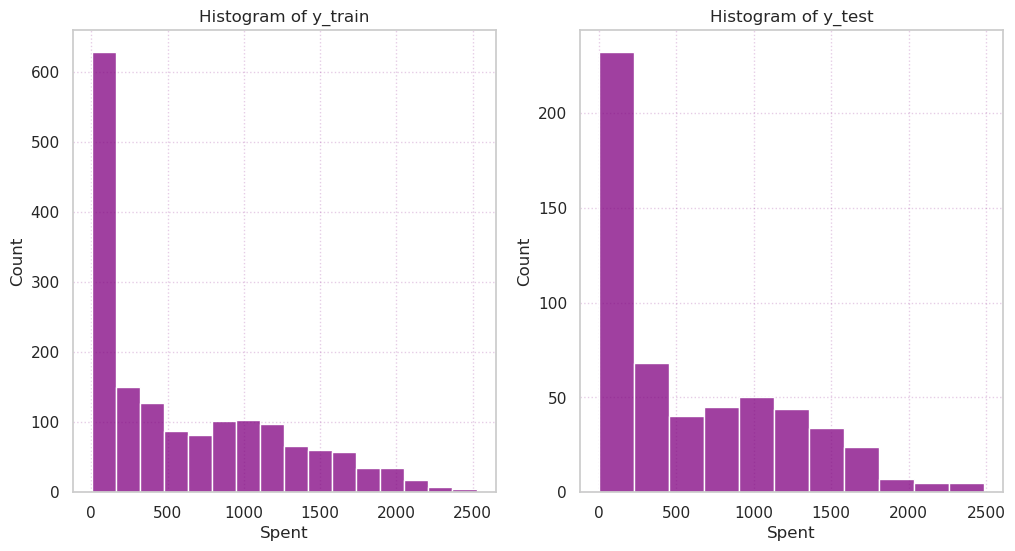

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_train, color='purple')
plt.title('Histogram of y_train')

plt.subplot(1, 2, 2)
sns.histplot(y_test, color='purple')
plt.title('Histogram of y_test')

plt.show()

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

-210.37810945951844


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income,0.004466
Recency,0.083475
WebPurch,30.928935
CatalogPurch,98.477494
StorePurch,48.206532
Age,-1.674952


In [22]:
predictions = lm.predict(X_test)

**Scatter diagram**

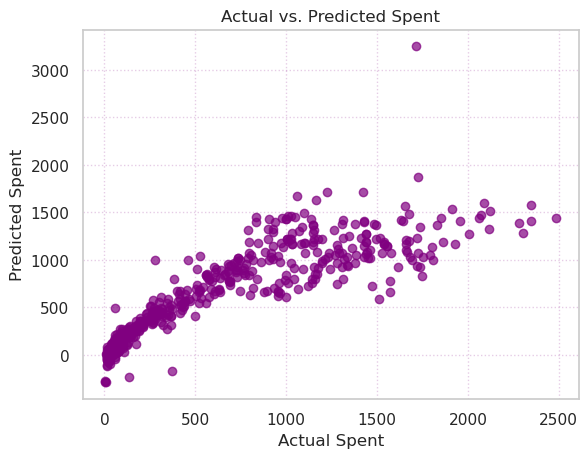

In [23]:
plt.scatter(y_test, predictions, color='purple', alpha=0.7)

plt.xlabel("Actual Spent")
plt.ylabel("Predicted Spent")
plt.title("Actual vs. Predicted Spent")
plt.show()

**Residual Histogram**

<Axes: xlabel='Spent', ylabel='Count'>

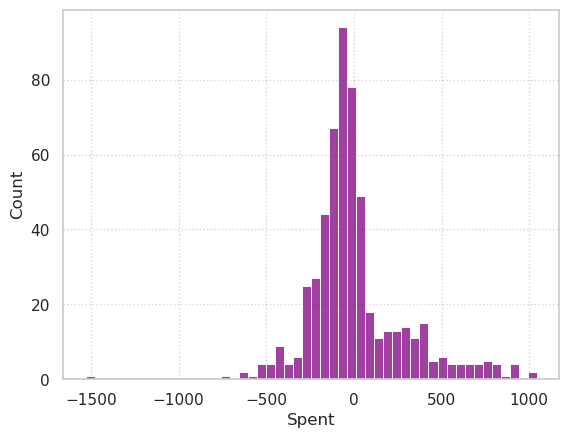

In [24]:
sns.histplot((y_test - predictions), bins=50, color='purple')